In [8]:
%load_ext autoreload
%autoreload 2

import vist
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

### Load Story-in-Sequence Instance

In [10]:
vist_images_dir = '/home/cnariset/tir5_cnariset/corpora/vist/images'
vist_annotations_dir = '/home/cnariset/tir5_cnariset/corpora/vist/annotations'
sis = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['train','val','test'])

### Filter train/val/test stories

In [ ]:
sis_train = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['train'])
sis_val = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['val'])
sis_test = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['test'])

In [ ]:
import json
! mkdir -p stories_jsons
with open('stories_jsons/stories_train.json', 'w', encoding='utf-8') as f:
    json.dump(sis_train.Stories, f, indent = 2)
with open('stories_jsons/stories_val.json', 'w', encoding='utf-8') as f:
    json.dump(sis_val.Stories, f, indent = 2)
with open('stories_jsons/stories_test.json', 'w', encoding='utf-8') as f:
    json.dump(sis_test.Stories, f, indent = 2)

### Filter 10k/3k/3k train/val/test stories that contain captions for every image

In [35]:
sis_train = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['train'], 
                                    retain_all_captions=True, max_stories=10000)
sis_val = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['val'], 
                                    retain_all_captions=True, max_stories=3000)
sis_test = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir, splits=['test'], 
                                    retain_all_captions=True, max_stories=3000)

sis's [train] loaded. It took 1.09 seconds.
dii's [train] loaded. It took 1.39 seconds.
Make mapping ...
Mapping for [Albums][Images][Stories][Sents] done.
Reached max number of stories: 10000
Retained 10000/40155 stories with captions.
sis's [val] loaded. It took 0.20 seconds.
dii's [val] loaded. It took 0.15 seconds.
Make mapping ...
Mapping for [Albums][Images][Stories][Sents] done.
Reached max number of stories: 3000
Retained 3000/4990 stories with captions.
sis's [test] loaded. It took 0.15 seconds.
dii's [test] loaded. It took 0.14 seconds.
Make mapping ...
Mapping for [Albums][Images][Stories][Sents] done.
Reached max number of stories: 3000
Retained 3000/5055 stories with captions.


In [36]:
len(sis_train.Stories), len(sis_val.Stories), len(sis_test.Stories)

(10000, 3000, 3000)

In [37]:
import json
! mkdir -p stories_withcaptions_jsons
with open('stories_withcaptions_jsons/stories_train.json', 'w', encoding='utf-8') as f:
    json.dump(sis_train.Stories, f, indent = 2)
with open('stories_withcaptions_jsons/stories_val.json', 'w', encoding='utf-8') as f:
    json.dump(sis_val.Stories, f, indent = 2)
with open('stories_withcaptions_jsons/stories_test.json', 'w', encoding='utf-8') as f:
    json.dump(sis_test.Stories, f, indent = 2)

### Print Loaded Mappings

In [17]:
len(sis.albums), len(sis.images), len(sis.stories), len(sis.sents), len(sis.captions)

(10040, 209651, 19783, 251000, 150600)

In [18]:
'Album #1', sis.albums[0], 'Story #1', sis.stories[0], 'Sentence #1', sis.sents[0]

('Album #1',
 {'description': 'Believed to be the largest Moreton Bay Fig Tree in the united States',
  'title': 'Moreton Bay Fig 1877',
  'farm': '4',
  'date_update': '1432330952',
  'primary': '2626985925',
  'server': '3104',
  'date_create': '1214980972',
  'photos': '13',
  'secret': '98149cd59b',
  'owner': '12806074@N08',
  'vist_label': '4th_of_july',
  'id': '72157605930515606',
  'split': 'train',
  'img_ids': ['2626977325',
   '2627795780',
   '2762593799',
   '2626979987',
   '2701863545',
   '2627798290',
   '2626982337',
   '2626983575',
   '2627801768',
   '2626985925',
   '2626987089',
   '2627805194',
   '2627807506'],
  'story_ids': ['30355', '30356', '30357', '30358', '30359']},
 'Story #1',
 {'id': '30355',
  'sent_ids': ['151775', '151776', '151777', '151778', '151779'],
  'sent_orders': [0, 1, 2, 3, 4],
  'sent_texts': ['our landmark tree in town was about to be destroyed and cleared for a new mall .',
   'so we decided to take the day to go out and enjoy its bea

### Check first two stories 
* Each image has 3 captions and at least 1 story-text
* Not all images have captions

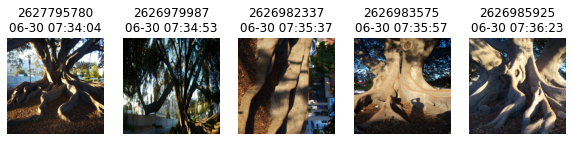

Image IDs: 
 ['2627795780', '2626979987', '2626982337', '2626983575', '2626985925']
Story of Images-in-Sequence (SIS):
 0: img_id[2627795780], our landmark tree in town was about to be destroyed and cleared for a new mall .
 1: img_id[2626979987], so we decided to take the day to go out and enjoy its beauty .
 2: img_id[2626982337], to see the final glimpse of the roots , extending out into the depths of the hill .
 3: img_id[2626983575], and its magnificent trunk , larger than life itself .
 4: img_id[2626985925], one last picture of its beauty so we could capture it forever .
Description of Images-in-Isolation (DII):
 0.0: img_id[2627795780], a large tree with roots that look like crocodile tails .
 0.1: img_id[2627795780], a tree has spread its roots high and wide across the ground .
 0.2: img_id[2627795780], a huge tree sits outside with several large roots stemming from the trunk .
 2.0: img_id[2626982337], huge brown tree roots rose above the ground .
 2.1: img_id[2626982337], so

In [19]:
story_ids = list(sis.Stories.keys())
story_id = story_ids[0]
sis.show_story(story_id)

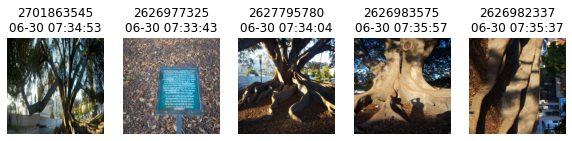

Image IDs: 
 ['2701863545', '2626977325', '2627795780', '2626983575', '2626982337']
Story of Images-in-Sequence (SIS):
 0: img_id[2701863545], we found this tree when we were walking in a nearby town .
 1: img_id[2626977325], it turns out it is a popular attraction here .
 2: img_id[2627795780], the tree is very unusual , with its roots exposed .
 3: img_id[2626983575], the trunk was really wide , as much as 12 feet !
 4: img_id[2626982337], you can see how big these roots are - pretty amazing !
Description of Images-in-Isolation (DII):
 0.0: img_id[2701863545], large tree with many outstretching branches and leaves .
 0.1: img_id[2701863545], a large tree with many branches coming out
 0.2: img_id[2701863545], the tree has very long and dated branches .
 1.0: img_id[2626977325], a green sign is describing a historic tree and the rules for visiting it .
 1.1: img_id[2626977325], a plaque describes an historical tree and advises visitors to not climb it .
 1.2: img_id[2626977325], a pla

In [20]:
story_ids = list(sis.Stories.keys())
story_id = story_ids[1]
sis.show_story(story_id)

## Here are some stats about SIS dataset.
### Story Stats w/ Entire Training Data:
* There are [40155] stories in [train] split.
* There are [4990] stories in [val] split.
* There are [5055] stories in [test] split.
* In total, there are [50200] stories.
* Among 50200 stories, 31481 [62.71%] are in order

In [21]:
# albums stats
split_to_album_ids = {'train': [], 'val': [], 'test': []}
total_albums = 0
for split in ['train', 'val', 'test']:
    split_to_album_ids[split] = [album_id for album_id, album in sis.Albums.items() if album['split'] == split]
    print('There are [%s] albums in [%s] split.' % (len(split_to_album_ids[split]), split))
    total_albums += len(split_to_album_ids[split])
print('In total, there are [%s] albums.' % total_albums)

There are [8031] albums in [train] split.
There are [998] albums in [val] split.
There are [1011] albums in [test] split.
In total, there are [10040] albums.


In [22]:
# stories stats
split_to_story_ids = {'train': [], 'val': [], 'test': []}
for story in sis.stories:
    album_id = story['album_id']
    split = sis.Albums[album_id]['split']
    split_to_story_ids[split] += [story['id']]
total_stories = 0
for split in ['train', 'val', 'test']:
    print('There are [%s] stories in [%s] split.' % (len(split_to_story_ids[split]), split))
    total_stories += len(split_to_story_ids[split])
print('In total, there are [%s] stories.' % (total_stories))

There are [9778] stories in [train] split.
There are [4975] stories in [val] split.
There are [5030] stories in [test] split.
In total, there are [19783] stories.


In [23]:
# sents stats
print('SIS:')
split_to_sent_ids = {'train': [], 'val': [], 'test': []}
for sent in sis.sents:
    album_id = sent['album_id']
    split = sis.Albums[album_id]['split']
    split_to_sent_ids[split] += [sent['id']]
total_sents = 0
for split in ['train', 'val', 'test']:
    print('There are [%s] sents in [%s] split.' % (len(split_to_sent_ids[split]), split))
    total_sents += len(split_to_sent_ids[split])
print('In total, there are [%s] sents.' % (total_sents))

SIS:
There are [200775] sents in [train] split.
There are [24950] sents in [val] split.
There are [25275] sents in [test] split.
In total, there are [251000] sents.


In [24]:
# check story order
def check_dts_order(dts):
    flag = True
    for i in range(1, len(dts)):
        if dts[i] <= dts[i-1]:
            flag = False
    return flag

inorder = 0
for story in sis.stories:
    dts = []
    for i, sent_id in enumerate(story['sent_ids']):
        sent = sis.Sents[sent_id]
        assert sent['order'] == i
        img = sis.Images[sent['img_id']]
        dt = datetime.strptime(img['datetaken'], '%Y-%m-%d %H:%M:%S')
        dts += [dt]
    if check_dts_order(dts):
        inorder += 1
print('Among %s stories, %s [%.2f%%] are in order' % (len(sis.stories), inorder, inorder*100.0/len(sis.stories)))

Among 19783 stories, 12128 [61.31%] are in order
